<a href="https://colab.research.google.com/github/willie240/telecom-x/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Limpeza dos Dados

Atividades para realizar nesta primeira etapa:


1.   Importar os dados;
2.   Compreender quais informações o dataset possui;
3.  Verificar as incosistencias;
4.  Corrigir as incossistencias;
5.  Traduzir as colunas e/ou dados;
6.  Criar coluna de contas diarias



## 1. Importando os dados

In [ ]:
import requests  # Biblioteca para fazer requisições HTTP
import json  # Biblioteca para manipulação de arquivos JSON
import pandas as pd  # Biblioteca para análise e manipulação de dados

# Definição da URL do arquivo JSON hospedado no GitHub
url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

# Fazendo uma requisição GET para obter os dados da URL
req = requests.get(url)

# Convertendo o conteúdo da resposta para um dicionário Python usando JSON
response = json.loads(req.text)

# Exibindo o primeiro registro da lista de dados
response[0]




{'customerID': '0002-ORFBO',
 'Churn': 'No',
 'customer': {'gender': 'Female',
  'SeniorCitizen': 0,
  'Partner': 'Yes',
  'Dependents': 'Yes',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'Yes',
  'DeviceProtection': 'No',
  'TechSupport': 'Yes',
  'StreamingTV': 'Yes',
  'StreamingMovies': 'No'},
 'account': {'Contract': 'One year',
  'PaperlessBilling': 'Yes',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}

In [ ]:
#transformando o json em um df
df = pd.json_normalize(response)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 2.Compreender quais informações o dataset possui



🔍 **Análise da Estrutura dos Dados**
Os dados são organizados em um formato hierárquico (dicionário dentro de dicionário), contendo as seguintes informações:

1. **Identificação do Cliente**  
   - `'customerID'`: Identificador único do cliente.  
   - `'Churn'`: Indica se o cliente cancelou o serviço (`Yes` ou `No`).  

2. **Informações do Cliente** (`'customer'`)  
   - `'gender'`: Gênero do cliente (`Male` ou `Female`).  
   - `'SeniorCitizen'`: Indica se o cliente é idoso (0 = Não, 1 = Sim).  
   - `'Partner'`: Se o cliente tem um parceiro(a).  
   - `'Dependents'`: Se o cliente tem dependentes.  
   - `'tenure'`: Tempo de permanência como cliente (em meses).  

3. **Serviços de Telefonia** (`'phone'`)  
   - `'PhoneService'`: Indica se o cliente possui serviço de telefone (`Yes` ou `No`).  
   - `'MultipleLines'`: Se possui múltiplas linhas telefônicas.  

4. **Serviços de Internet** (`'internet'`)  
   - Tipo de serviço de internet contratado (`DSL`, `Fiber optic`, `No`).  
   - Serviços adicionais (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).  

5. **Informações da Conta** (`'account'`)  
   - `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).  
   - `'PaperlessBilling'`: Se o cliente recebe faturas eletrônicas.  
   - `'PaymentMethod'`: Método de pagamento (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).  
   - `'Charges'`:  
     - `'Monthly'`: Valor mensal cobrado.  
     - `'Total'`: Valor total pago pelo cliente.  



**Normalização dos dados**(opcional):  transformando uma estrutura aninhada (hierárquica) em um formato tabular, tornando-a mais adequada para análise com Pandas


In [ ]:

df = pd.json_normalize(response)
df.rename(columns={'account.Charges.Monthly': 'Charges_Monthly',
                   'account.Charges.Total': 'Charges_Total'}, inplace=True)
df.rename(columns=lambda x: x.split('.')[-1], inplace=True)

df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Analisando os tipos de dados**:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


O dataset possui 21 variáveis, sendo a maioria do tipo `object`, o que indica a presença de dados categóricos. Um ponto de atenção é a coluna `Charges_Total`, que está no formato `object`, mas deveria ser numérica (`float`), possivelmente devido a valores inconsistentes, como espaços em branco ou caracteres inválidos. Podemos convertê-la usando `pd.to_numeric(df['Charges_Total'], errors='coerce')`. Além disso, não há valores nulos aparentes, mas é recomendável verificar a presença de espaços em branco ou símbolos que possam indicar dados ausentes. Outra possível melhoria é a normalização de colunas com valores `Yes/No`, transformando-os em `1/0` para facilitar análises e modelagem.

## 3. Verificando as Incosistencias

Verificando valores unicos

In [ ]:
for col in df.columns:
    print(f'Coluna: {col}')
    print(df[col].unique())
    print('-' * 50)  # Linha divisória para melhor visualização


Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
Coluna: Churn
['No' 'Yes' '']
--------------------------------------------------
Coluna: gender
['Female' 'Male']
--------------------------------------------------
Coluna: SeniorCitizen
[0 1]
--------------------------------------------------
Coluna: Partner
['Yes' 'No']
--------------------------------------------------
Coluna: Dependents
['Yes' 'No']
--------------------------------------------------
Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Coluna: PhoneService
['Yes' 'No']
--------------------------------------------------
Coluna: MultipleLines
['No' 'Yes' 'No phone service']
---------

🔍 **Analisando as inconsistências no dataset**
Com base na saída, encontramos alguns possíveis problemas:

1️⃣ **Valores vazios na coluna "Churn"**  
   - Há uma string vazia (`''`), o que pode indicar dados ausentes.  
   - Solução: Substituir por um valor adequado (ex: `NaN`) ou pela categoria mais frequente.  

2️⃣ **Valores inconsistentes em colunas categóricas**  
   - Algumas colunas têm categorias como `'No phone service'` e `'No internet service'`, que podem ser tratadas como `'No'` para facilitar análises.  
   - Exemplo: A coluna `MultipleLines` tem três valores: `'No'`, `'Yes'` e `'No phone service'`. Se `'No phone service'` significa ausência de linha telefônica, podemos converter para `'No'`.  

3️⃣ **Coluna "Charges_Total" está como `object` (string)**  
   - Devia ser numérica (`float`), mas provavelmente há caracteres indesejados.  
   - Solução: Converter com `pd.to_numeric(df['Charges_Total'], errors='coerce')`, verificando se há valores inválidos.  

4️⃣ **Categoria "InternetService" influencia outras colunas**  
   - Colunas como `OnlineSecurity`, `OnlineBackup`, etc., contêm `'No internet service'`.  
   - Podemos substituir `'No internet service'` por `'No'` para unificar as respostas.  

---

Valore ausentes e datos em branco

In [ ]:
# Verificar se existem valores ausentes (NaN) ou espaços em branco
df.isnull().sum()  # Mostra o total de valores ausentes (NaN) por coluna


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:

# Verificar se existem espaços em branco ou strings vazias
df.apply(lambda x: x.astype(str).str.strip() == "").sum()  # Mostra o total de espaços em branco ou strings vazias por coluna

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Combinação: Encontrar linhas que tenham valores ausentes ou espaços em branco
df_with_empty_or_null = df[df.isnull().any(axis=1) | df.apply(lambda x: x.astype(str).str.strip() == "", axis=1).any(axis=1)]

# Exibir as linhas com valores ausentes ou espaços em branco
print(df_with_empty_or_null)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
30    

**Resumo das Inconsistências Encontradas no Dataset**

O dataset possui várias inconsistências que podem impactar a análise dos dados.

Abaixo estão as principais questões identificadas:

1. **Valores Ausentes**:
   - A coluna `Churn` contém valores vazios (`''`), o que pode ser tratado com imputação, utilizando o valor mais frequente (moda) para preencher as lacunas.
   - A coluna `Charges_Total` apresenta valores numéricos representados como strings (ex.: `'929.3'`), o que precisa ser corrigido convertendo-os para o tipo numérico (`float`).

2. **Valores Categóricos Inconsistentes**:
   - Algumas colunas, como `gender`, podem ter variações de capitalização (ex.: `'Female'` e `'female'`). A normalização dos valores dessas colunas (por exemplo, capitalizando todas as entradas) é necessária para garantir consistência.
   - Algumas colunas de serviços (como `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, etc.) apresentam o valor `'No internet service'`, que pode ser interpretado como um valor ausente. Esses valores podem ser substituídos por `NaN` para uniformizar os dados.

3. **Problemas de Formatação**:
   - A coluna `Charges_Total` contém valores representados como strings numéricas (ex.: `'929.3'`), o que requer conversão para valores numéricos para permitir análises matemáticas.
   
4. **Valores Duplicados ou Redundantes**:
   - Embora não tenha sido identificado explicitamente, é importante verificar se há duplicação de valores no `customerID` ou em outras colunas, caso isso ocorra, deve ser tratado.

5. **Possível Impacto de Outliers**:
   - A coluna `tenure` pode conter valores extremos ou anômalos que precisam ser verificados e, dependendo do caso, podem ser tratados, possivelmente removendo ou ajustando valores considerados outliers.

6. **Valores 'No internet service' em Colunas de Serviços**:
   - As colunas que representam diferentes serviços, como `OnlineSecurity`, `DeviceProtection`, `TechSupport`, e outras, têm valores como `'No internet service'`, que podem ser tratados como `NaN` para consistência e para evitar distorções nas análises de dados.




## 4. Corrigindo as Incosistencias

Valores ausentes e nulos

In [ ]:
import numpy as np

# Substituir espaços em branco "" por NaN na coluna 'Churn'
df['Churn'] = df['Churn'].replace(r'^\s*$', np.nan, regex=True)




In [ ]:
#Convertendo a coluna 'Charges_Total' para o tipo float
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')



In [ ]:
df.Charges_Total.isna().sum()  #Vendo os valores nulos

np.int64(11)

In [ ]:
df[df.Charges_Total.isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Todos os registros com o valor Charges_Total nulo correspondem a clientes cujo tenure é igual a 0, indicando que esses clientes estão no seu primeiro mês de contrato e ainda não realizaram nenhum gasto. Portanto, para garantir consistência nos dados, o valor de Charges_Total para esses registros deve ser ajustado para 0, refletindo a ausência de gastos no primeiro mês.

In [ ]:
# Substituindo os valores nulos na coluna Charges_Total por 0 sem usar inplace
df['Charges_Total'] = df['Charges_Total'].fillna(0)

# Verificando se há valores nulos restantes na coluna Charges_Total
nulos = df['Charges_Total'].isna().sum()

# Exibindo a quantidade de valores nulos restantes
print(f'Após a transformação, há {nulos} valores nulos na coluna Charges_Total.')


Após a transformação, há 0 valores nulos na coluna Charges_Total.


Valores Categóricos Inconsistentes:

In [ ]:
#padronizando os resultados da tabela "gender" para minusculo

df['gender'] = df['gender'].str.lower()




In [ ]:
#Categorizando 'No internet service' como 'Nan' para uma melhor visualização

cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

df[cols_to_replace] = df[cols_to_replace].replace('No internet service', np.nan)

Valores duplicados ou redundantes

In [ ]:
# Contar o número de duplicatas
numero_duplicados = df.duplicated().sum()
print(f"Número de linhas duplicadas: {numero_duplicados}")


Número de linhas duplicadas: 0


In [ ]:
# Contar o número de duplicatas
numero_duplicados = df.duplicated().sum()
print(f"Número de linhas duplicadas: {numero_duplicados}")


Número de linhas duplicadas: 0


## 5.Padronização e Transformação de Dados

A padronização e transformação de dados é uma etapa opcional, mas muito importante, pois visa tornar as informações mais consistentes, compreensíveis e adequadas para análise. Durante essa fase, é possível converter valores textuais como "Sim" e "Não" em valores binários (1 e 0), o que facilita o processamento matemático e a aplicação de modelos analíticos. Além disso, a tradução e padronização dos nomes das colunas para um formato mais acessível ao cliente torna os dados mais legíveis e compreensíveis para todos os envolvidos, especialmente quando os resultados forem apresentados a stakeholders não técnicos. Embora essa etapa não seja obrigatória, ela pode melhorar significativamente a clareza e a eficácia na análise de dados, além de ajudar na comunicação com o cliente.

Transformando 'yes':1 e 'no':0

In [ ]:
# Lista de colunas que possuem valores 'Yes' e 'No'
yes_no_columns = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Aplicando a transformação de 'Yes' para 1 e 'No' para 0
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


Tradução para o português

In [ ]:
# Dicionário para tradução dos gêneros
dict_gender = {'male': 'homem', 'female': 'mulher'}

# Substituindo os valores na coluna 'gender'
df['gender'] = df['gender'].map(dict_gender)

# Verificando os valores únicos após a substituição
df['gender'].unique()



array(['mulher', 'homem'], dtype=object)

In [ ]:
# Passo 1: Verificar os valores únicos na coluna para depuração
print("Valores únicos antes da substituição:", df['Contract'].unique())

# Passo 2: Padronizar os valores da coluna para garantir que as comparações funcionem corretamente
df['Contract'] = df['Contract'].str.strip().str.title()

# Passo 3: Substituir os valores com o dicionário
contratos = {'Month-To-Month': 'Mensal', 'Two Year': 'Bienal', 'One Year': 'Anual'}
df['Contract'] = df['Contract'].replace(contratos)

# Passo 4: Verificar se houve algum valor não mapeado corretamente
print("Valores que não foram mapeados corretamente:", df[df['Contract'].isna()])

# Passo 5: Verificar os valores únicos após a substituição
print("Valores únicos após a substituição:", df['Contract'].unique())


Valores únicos antes da substituição: ['One year' 'Month-to-month' 'Two year']
Valores que não foram mapeados corretamente: Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges_Monthly, Charges_Total]
Index: []

[0 rows x 21 columns]
Valores únicos após a substituição: ['Anual' 'Mensal' 'Bienal']


In [ ]:
# Passo 1: Verificar os valores únicos antes da substituição
print("Valores únicos antes da substituição:", df['PaymentMethod'].unique())

# Passo 2: Substituir os valores com o dicionário
metodo_pagamento = {'Electronic check': 'Cheque eletrônico',
                    'Mailed check': 'Cheque',
                    'Bank transfer (automatic)': 'Transferência bancária automática',
                    'Credit card (automatic)': 'Cartão de crédito automático'}

# Substituir os valores na coluna PaymentMethod sem usar inplace=True
df['PaymentMethod'] = df['PaymentMethod'].replace(metodo_pagamento)

# Passo 3: Verificar se houve algum valor não mapeado corretamente
print("Valores que não foram mapeados corretamente:", df[df['PaymentMethod'].isna()])

# Passo 4: Verificar os valores únicos após a substituição
print("Valores únicos após a substituição:", df['PaymentMethod'].unique())


Valores únicos antes da substituição: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores que não foram mapeados corretamente: Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges_Monthly, Charges_Total]
Index: []

[0 rows x 21 columns]
Valores únicos após a substituição: ['Cheque' 'Cheque eletrônico' 'Cartão de crédito automático'
 'Transferência bancária automática']


In [ ]:
dict_colunas_traduzido = {
'customerID':'ID_cliente',
'Churn' : 'Evasao',
'gender' :'Genero',
'SeniorCitizen' : 'Cidadao_Senior',
'Partner' : 'Parceiro',
'Dependents' : 'Dependentes',
'tenure' : 'Tempo_de_contrato',
'PhoneService' : 'Servico_de_telefone',
'MultipleLines' : 'Linhas_multiplas',
'InternetService': 'Servico_de_internet',
'OnlineSecurity' :'Segurnaca_online',
'OnlineBackup' : 'Backup_online',
'DeviceProtection' : 'Protecao_dipositivo',
'TechSupport' : 'Suporte_tecnico',
'StreamingTV' : 'Streaming_TV',
'StreamingMovies' : 'Streaming_filmes',
'Contract' : 'Tipo_de_contrato',
'PaperlessBilling' : 'Fatura_online' ,
'PaymentMethod' : 'Metodo_de_pagamento',
'Charges_Monthly' : 'Total_servico_mes',
'Charges_Total' : 'Total_gasto'
}

df.rename(columns = dict_colunas_traduzido, inplace = True)
df.columns

Index(['ID_cliente', 'Evasao', 'Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Tempo_de_contrato', 'Servico_de_telefone',
       'Linhas_multiplas', 'Servico_de_internet', 'Segurnaca_online',
       'Backup_online', 'Protecao_dipositivo', 'Suporte_tecnico',
       'Streaming_TV', 'Streaming_filmes', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento', 'Total_servico_mes', 'Total_gasto'],
      dtype='object')

In [ ]:
for col in df.columns:
    print(f'Coluna: {col}')
    print(df[col].unique())
    print('-' * 50)  # Linha divisória para melhor visualização

Coluna: ID_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
Coluna: Evasao
[ 0.  1. nan]
--------------------------------------------------
Coluna: Genero
['mulher' 'homem']
--------------------------------------------------
Coluna: Cidadao_Senior
[0 1]
--------------------------------------------------
Coluna: Parceiro
[1 0]
--------------------------------------------------
Coluna: Dependentes
[1 0]
--------------------------------------------------
Coluna: Tempo_de_contrato
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Coluna: Servico_de_telefone
[1 0]
--------------------------------------------------
Coluna: Linhas_multiplas
[ 0.  1. nan]
------------------------

## 6.Criar coluna de contas diarias (Opcional)

In [ ]:
# Calculando os gastos diários
df['Total_servico_dia'] = (df['Total_gasto'] / df['Tempo_de_contrato']).round(2)

# Inserindo a coluna na posição 19
df.insert(19, 'Total_servico_dia', df.pop('Total_servico_dia'))


In [ ]:
df.head()


,ID_cliente,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Servico_de_internet,...,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Metodo_de_pagamento,Total_servico_dia,Total_servico_mes,Total_gasto
0,0002-ORFBO,0.0,mulher,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,Anual,1,Cheque,65.92,65.6,593.30
1,0003-MKNFE,0.0,homem,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Mensal,0,Cheque,60.27,59.9,542.40
2,0004-TLHLJ,1.0,homem,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Mensal,1,Cheque eletrônico,70.21,73.9,280.85
3,0011-IGKFF,1.0,homem,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Mensal,1,Cheque eletrônico,95.22,98.0,1237.85
4,0013-EXCHZ,1.0,mulher,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Mensal,1,Cheque,89.13,83.9,267.40


In [ ]:
df.to_csv("Tabela tratada.csv")

# 2. Análise Exploratoria e Visualização

Análise descritiva basica

In [ ]:
# Análise descritiva básica
df.describe()



,Evasao,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Fatura_online,Total_servico_dia,Total_servico_mes,Total_gasto
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7256.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.756883,64.720098,2277.182035
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.223260,30.129572,2268.648587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.780000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.750000,35.425000,396.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.250000,70.300000,1389.200000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.180000,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.400000,118.750000,8684.800000


A partir dessa análise descritiva, podemos retirar várias informações interessantes sobre o conjunto de dados, especialmente sobre a **evasão** (Churn) e as características dos clientes. Vou destacar alguns insights importantes:

### 1. **Distribuição de Evasão (Churn)**:
   - **Média**: A média de `Evasao` é de 0.265, o que significa que aproximadamente 26,5% dos clientes estão em processo de evasão (Churn).
   - **Desvio padrão**: O desvio padrão de 0.44 sugere que há uma variação considerável entre os clientes que permaneceram e os que saíram.
   - **Valores mínimo e máximo**: O mínimo é 0, o que representa os clientes que não abandonaram, e o máximo é 1, que representa os que saíram.

### 2. **Cidadão Sênior (SeniorCitizen)**:
   - **Média**: A média de `Cidadao_Senior` é 0.16, o que indica que uma proporção muito pequena dos clientes são cidadãos seniores (aproximadamente 16%).
   - **Desvio padrão**: O desvio padrão de 0.37 mostra que a distribuição de cidadãos seniores é bastante irregular.

### 3. **Parceiro e Dependentes**:
   - **Parceiro**: A média de `Parceiro` é 0.48, indicando que aproximadamente metade dos clientes tem um parceiro.
   - **Dependentes**: A média de `Dependentes` é 0.30, sugerindo que cerca de 30% dos clientes têm dependentes.

### 4. **Tempo de contrato**:
   - A média de `Tempo_de_contrato` é 32.35 meses, com um desvio padrão de 24.57. Isso indica que, embora a maioria dos clientes tenha um tempo de contrato abaixo da média, o intervalo é bem amplo, abrangendo clientes com contratos curtos e longos.

### 5. **Serviço de telefone e múltiplas linhas**:
   - A variável `Servico_de_telefone` tem uma média muito próxima de 1 (0.90), o que significa que a maioria dos clientes tem serviço de telefone.
   - Para `Linhas_multiplas`, a média é 0.47, indicando que uma proporção considerável dos clientes não usa múltiplas linhas de telefone.

### 6. **Serviços adicionais (Segurança Online, Backup, Proteção de Dispositivos, Suporte Técnico)**:
   - A presença desses serviços é geralmente baixa, com médias em torno de 0.37 a 0.44. Isso sugere que muitos clientes não estão utilizando esses serviços adicionais.
   - **Streaming TV e filmes**: Essas variáveis têm médias mais altas, com aproximadamente 0.49 a 0.50, indicando que os clientes tendem a usar serviços de streaming.

### 7. **Fatura e Total Gasto**:
   - **Total_servico_dia**: A média de 64.76 sugere que, em média, os clientes pagam cerca de R$ 64,76 por dia pelos serviços.
   - **Total_servico_mes**: A média de R$ 64,72 por mês está bem próxima da diária, indicando que o valor mensal é calculado de forma consistente.
   - **Total_gasto**: A média de R$ 2277.18 reflete o total gasto ao longo do tempo de contrato do cliente. Há uma variação considerável, com um desvio padrão de 2268.64, o que sugere que alguns clientes têm gastos muito mais altos que outros.


### Conclusão:
A análise descritiva inicial nos dá uma boa ideia de como os dados estão distribuídos e quais características são mais prevalentes entre os clientes. A distribuição de **evasão** é uma informação crucial, pois nos ajuda a identificar quantos clientes estão abandonando os serviços. Além disso, a variação nos gastos e no tempo de contrato pode fornecer insights sobre a lealdade dos clientes, suas preferências de serviço e o impacto de serviços adicionais na decisão de manter ou cancelar o contrato.

Esse tipo de análise é um bom ponto de partida para aprofundar as investigações, por exemplo, verificando se há correlação entre o tempo de contrato, serviços contratados e a evasão.

Contagem de Evasão

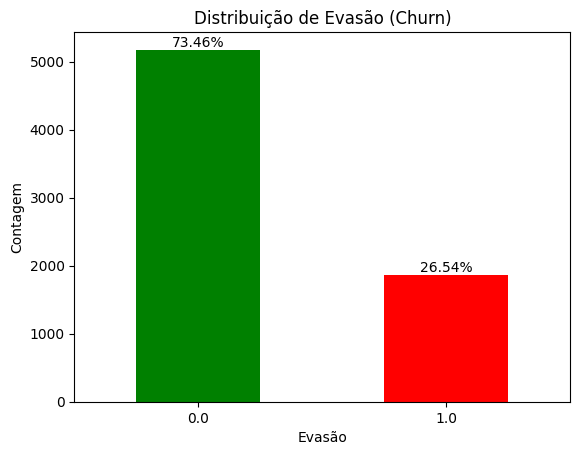

In [ ]:
import matplotlib.pyplot as plt

# Contagem de Evasão
evasao_counts = df['Evasao'].value_counts()

# Calcular a porcentagem
evasao_percentage = (evasao_counts / evasao_counts.sum()) * 100

# Criar o gráfico de barras
ax = evasao_counts.plot(kind='bar', color=['green', 'red'], title='Distribuição de Evasão (Churn)')

# Adicionar as porcentagens dentro das barras
for i, v in enumerate(evasao_counts):
    ax.text(i, v + 2, f'{evasao_percentage[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.xlabel('Evasão')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Para manter as labels legíveis
plt.show()


Com base nos dados fornecidos, a distribuição da **evasão (Churn)** indica que **26,54%** dos clientes abandonaram o serviço, enquanto **73,46%** mantiveram a assinatura. Essa taxa de evasão de 26,54% é relativamente alta para empresas de **serviços de assinatura**, o que sugere que uma parte significativa dos clientes não está permanecendo com a empresa.

Aqui estão alguns pontos importantes sobre essa distribuição:

1. **Maioria Retém o Serviço**: Embora a evasão seja alta, mais de **70%** dos clientes continuam com o serviço. Isso indica que a empresa ainda tem uma base fiel de clientes.

2. **Alta Taxa de Desistência**: A taxa de **evasão** de 26,54% é uma preocupação, pois muitos clientes estão abandonando o serviço. Esse índice pode ser um sinal de que **estratégias de retenção** precisam ser melhoradas.

3. **Causas Possíveis**: A evasão pode ser influenciada por diversos fatores, como **preço**, **qualidade do serviço**, **concorrência**, **atendimento ao cliente** ou até mesmo **mudança nas necessidades dos consumidores**. Para reduzir a evasão, a empresa pode investir em estratégias de **fidelização**, **melhorias no produto/serviço** ou **promoções**.

4. **Oportunidade de Melhoria**: Com 26,54% de clientes saindo, há uma oportunidade de entender o **motivo da desistência** e trabalhar em ações mais específicas, como melhorar a **experiência do usuário**, oferecer **planos diferenciados** ou **reduzir o churn** com **programas de recompensas ou fidelidade**.

### Resumo:
A distribuição de **evasão** mostra que, embora a maior parte dos clientes continue com o serviço, a taxa de **26,54% de evasão** é significativa e merece atenção. A empresa pode considerar investigar as causas dessa evasão e implementar **estratégias de retenção** para melhorar a **fidelização de clientes**.

Contagem de Evasão por Variáveis Categóricas (Visualizações importantes em relação a evasão)

A análise do gráfico permite algumas interpretações sobre os fatores relacionados à evasão de clientes. Aqui estão alguns insights:  

1. **Gênero**: A evasão ocorre em proporções semelhantes para homens e mulheres, indicando que o gênero não tem um impacto significativo.  

2. **Cidadão Sênior**: Clientes seniores (1) parecem ter uma taxa de evasão mais alta proporcionalmente em comparação com os não seniores (0).  

3. **Parceiro**: Clientes sem parceiro (0) apresentam uma taxa de evasão mais alta do que aqueles com parceiro (1), sugerindo que clientes solteiros podem ser mais propensos a cancelar o serviço.  

4. **Dependentes**: Clientes sem dependentes (0) possuem uma taxa de evasão maior, indicando que clientes com dependentes podem ser mais estáveis.  

5. **Serviço de Telefone**: Clientes que possuem serviço de telefone (1) apresentam uma evasão maior em comparação com aqueles que não têm (0).  

6. **Serviço de Internet**: Clientes com serviço de fibra óptica têm uma taxa de evasão maior do que aqueles com DSL ou sem internet. Isso pode indicar insatisfação com o serviço de fibra óptica.  

7. **Tipo de Contrato**: Clientes com contratos mensais apresentam maior taxa de evasão em comparação com contratos anuais e bienais, indicando que contratos de longo prazo podem reduzir a evasão.  

8. **Fatura Online**: Clientes que recebem a fatura online (1) apresentam uma taxa de evasão maior do que aqueles que não recebem online (0).  

9. **Método de Pagamento**: Clientes que pagam via cheque eletrônico apresentam a maior taxa de evasão, enquanto aqueles que usam débito automático têm a menor taxa. Isso pode indicar que a automação do pagamento está relacionada à retenção dos clientes.  

Essas observações podem ser úteis para estratégias de retenção, como oferecer incentivos para clientes mensais migrarem para contratos mais longos, melhorar a experiência dos clientes de fibra óptica e promover o débito automático como método de pagamento preferencial.

1. Contagem de Evasão por Variáveis Categóricas

In [ ]:
df.Metodo_de_pagamento.unique().tolist()

['Cheque',
 'Cheque eletrônico',
 'Cartão de crédito automático',
 'Transferência bancária automática']

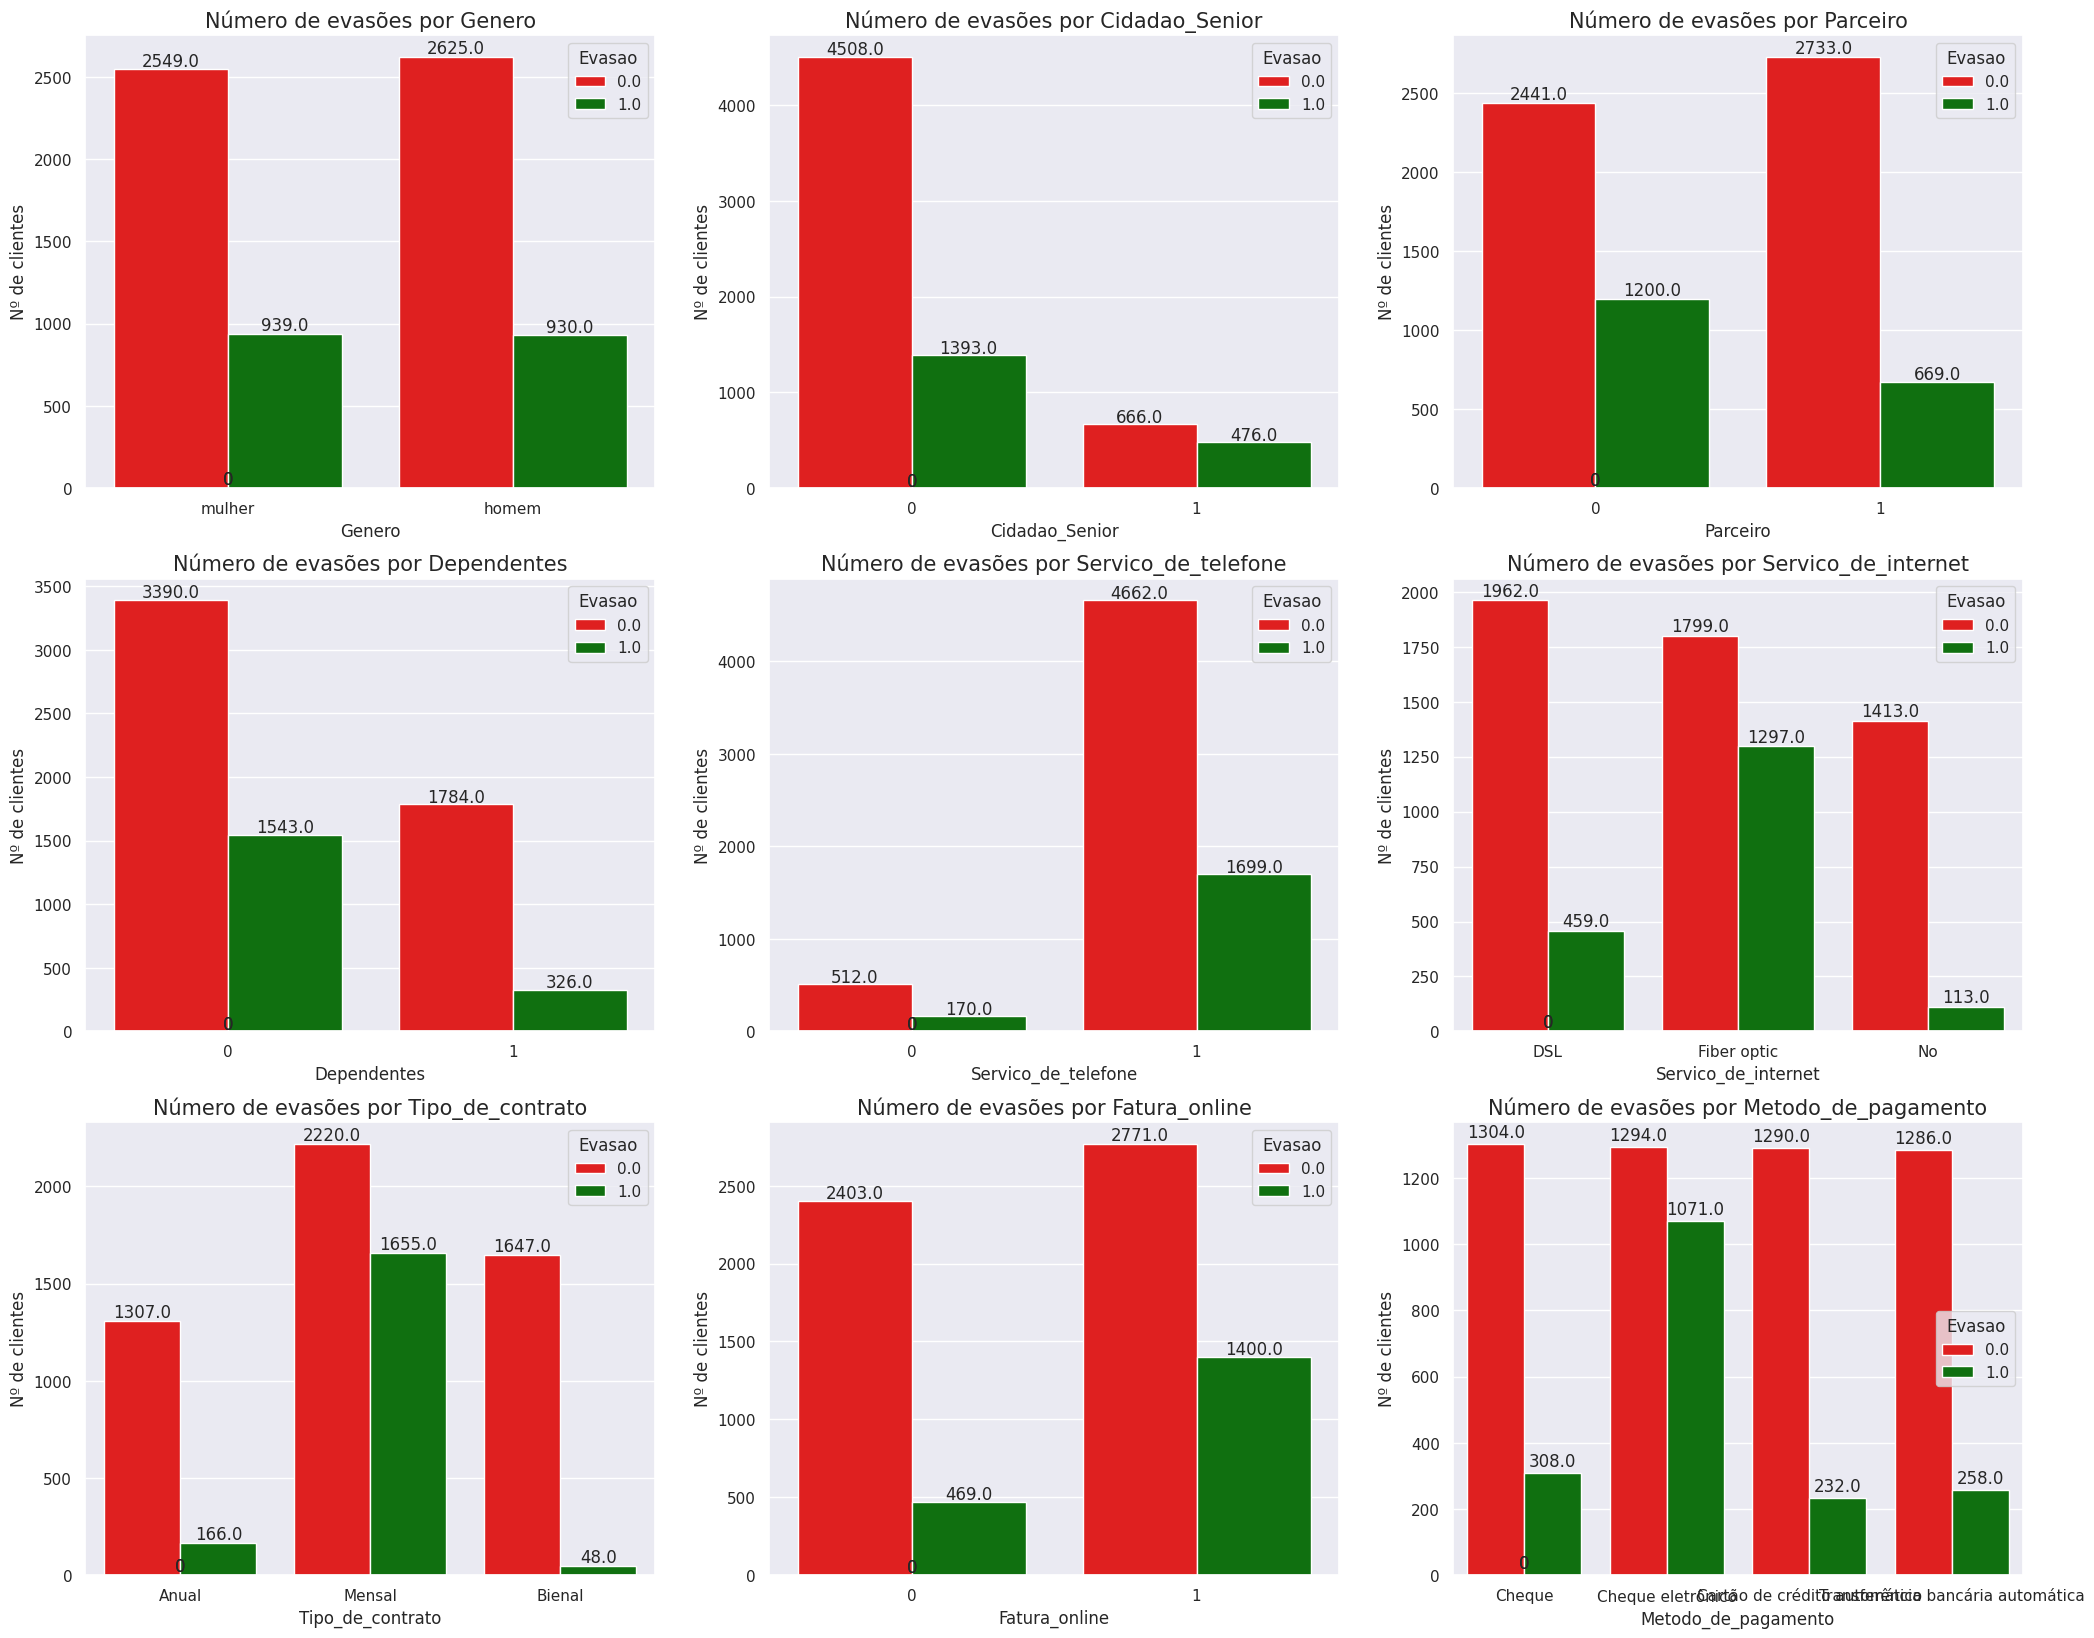

In [ ]:
import seaborn as sns

variaveis_categoricas = ['Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Servico_de_telefone', 'Servico_de_internet', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento',]

lista_variaveis_categoricas = list(enumerate(variaveis_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variaveis_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df,
                    x = i[1],
                    hue = 'Evasao',
                    palette = {'green', 'red'},
                    )

    ax.set_title(f'Número de evasões por {i[1]}', fontsize = 15) # Adicionando título e aumentando o tamanho da fonte
    ax.set_ylabel('Nº de clientes', fontsize = 12) # Mudando o título do eixo Y e aumentando o tamanho da fonte
    ax.set_xlabel(i[1], fontsize = 12) # Mudando o título do eixo X e aumentando o tamanho da fonte

    # Adicionando rotúlo de dados do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

2. Contagem de Evasão por Variáveis Numericas

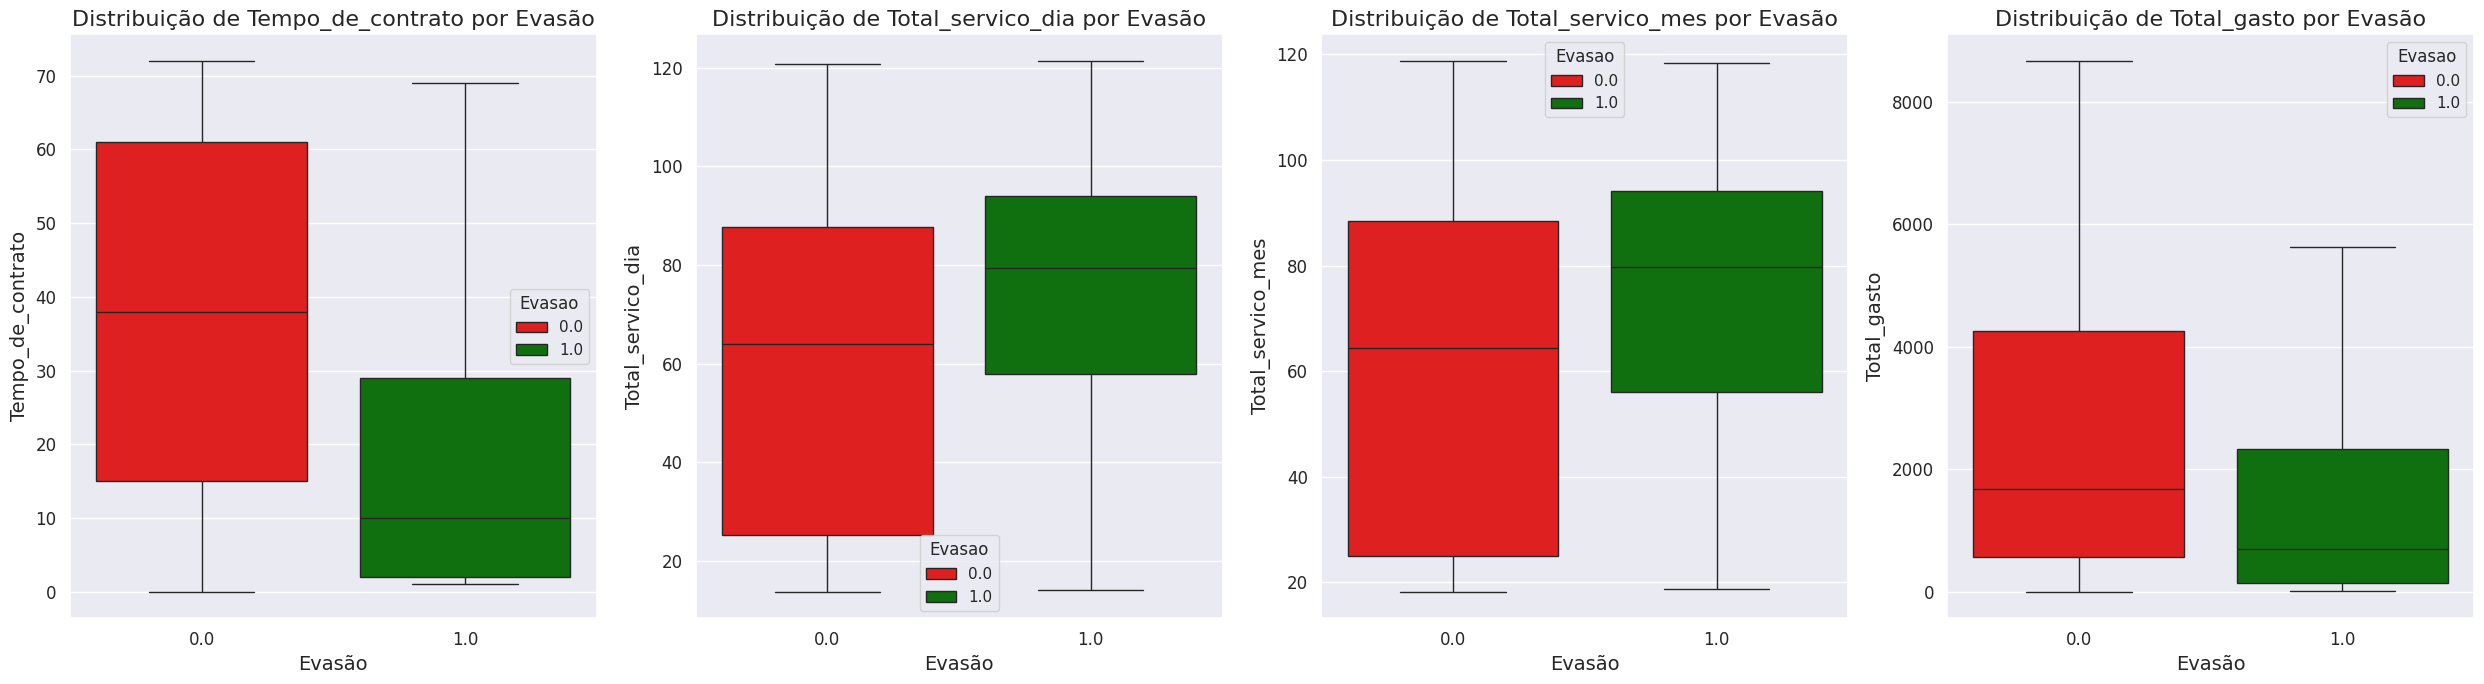

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_numericas = ['Tempo_de_contrato', 'Total_servico_dia', 'Total_servico_mes', 'Total_gasto']

lista_variaveis_numericas = list(enumerate(variaveis_numericas))

# Definindo o estilo do Seaborn
sns.set(rc={'figure.figsize':(25,7)})

# Ajuste no layout da figura
for i in lista_variaveis_numericas:
    plt.subplot(1, 4, i[0]+1)

    # Boxplot com a paleta de cores ajustada
    ax_1 = sns.boxplot(data=df,
                       x='Evasao',
                       y=i[1],
                       hue='Evasao',  # Colocando Evasao como variável de hue
                       palette={0: 'red', 1: 'green'},  # Associa as cores corretamente
                       showfliers=False)  # Opcional: para não exibir outliers

    # Títulos e rótulos mais claros
    ax_1.set_title(f'Distribuição de {i[1]} por Evasão', fontsize=16)
    ax_1.set_xlabel('Evasão', fontsize=14)
    ax_1.set_ylabel(i[1], fontsize=14)

    # Melhorando a exibição de valores no eixo y
    ax_1.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


Com base nos boxplots apresentados, podemos fazer as seguintes interpretações sobre os fatores relacionados à evasão de clientes:  

1. **Tempo de contrato por evasão**:  
   - Clientes que não evadiram (0.0) possuem um tempo de contrato significativamente maior, com a mediana próxima de 40 meses.  
   - Clientes que evadiram (1.0) tendem a ter contratos mais curtos, com a mediana abaixo de 20 meses.  
   - Isso sugere que clientes que permanecem por mais tempo no serviço são menos propensos a cancelar.  

2. **Total de serviço por dia e por mês por evasão**:  
   - Os boxplots das métricas **Total_servico_dia** e **Total_servico_mes** são bastante similares para clientes que evadiram e os que permaneceram.  
   - Isso sugere que a quantidade de serviço utilizado diariamente e mensalmente não tem um impacto significativo na evasão.  

3. **Total gasto por evasão**:  
   - Clientes que não evadiram (0.0) tendem a gastar mais, com uma mediana mais alta e maior dispersão nos gastos.  
   - Clientes que evadiram (1.0) apresentam um total gasto consideravelmente menor.  
   - Isso pode indicar que clientes com gastos menores podem estar menos engajados ou menos satisfeitos com o serviço, o que pode levá-los a cancelar.  

### Conclusão:  
- **Clientes com contratos mais curtos são mais propensos à evasão**, reforçando a importância de estratégias para incentivar contratos de longo prazo.  
- **O nível de uso diário e mensal do serviço não parece influenciar diretamente a evasão**.  
- **Clientes que gastam menos têm maior tendência a evadir**, sugerindo que pode haver uma correlação entre menor engajamento e cancelamento do serviço.  



In [ ]:
df.to_csv('dados_telecom_limpos.csv', index=False)
